# Defendiendo el matchmaking de Smite

Usando la ciencia para defender el sistema de matchmaking de Smite.

Unas cuantas aclaraciones:
* El experimento y los calculos son válidos únicamente bajo las condiciones aquí descritas.
* Se tuvieron que crear jugadores con valores de MMR 'ficticios', estos valores no son los verdaderos ya que no se puede acceder a estos datos de manera directa.
* Los resultados se basan en que todos los jugadores apuntan cola al mismo tiempo y que están dentro del mismo servidor. Debido a esto, los resultados pueden variar enormemente.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import random

Generar los jugadores ficticios con sus valores de MMR

In [ ]:
playerlist1 = random.sample(range(0,3500),2500) # generar el MMR para 2500 jugadores
playerlist2 = random.sample(range(0,3500),2667) # generar el MMR para el resto

available_players = np.arange(1,5001,1) # generar los jugadores

In [ ]:
total_players = playerlist1 + playerlist2 # meter a todos los jugadores en una misma lista

In [ ]:
mean = np.mean(total_players) # calcular la media
std = np.std(total_players) # calcular la desviación estándar

print('Media aritmética: %d' % int(mean))
print('Desviación estandar: %.2f' % std)

Media aritmética: 1753
Desviación estandar: 1011.98


In [ ]:
pdf = norm.pdf(total_players,loc=mean, scale=std) # calcular la distribución

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


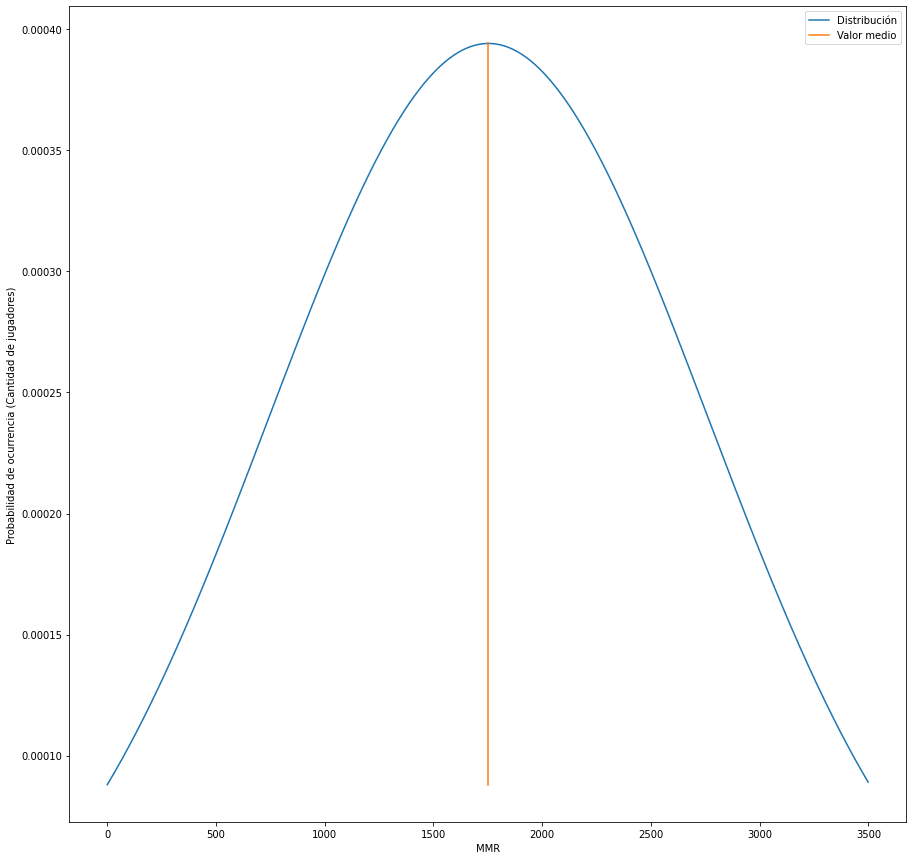

In [ ]:
x1,y1 = [mean,mean], [min(pdf),max(pdf)] # las coordenas de la media para poder graficarla

plt.figure(figsize=(15,15)) # establecer el tamaño
sns.lineplot(total_players, pdf) # graficar la curva
# sns.lineplot(x1,y1,color='blue')
plt.plot(x1,y1)
plt.xlabel('MMR') # texto del eje x
plt.ylabel('Probabilidad de ocurrencia (Cantidad de jugadores)') # texto del eje y
plt.legend(['Distribución','Valor medio'])
plt.show()

## Calculando las probabilidades

El primer caso será con una varianza de $\pm300$, es decir, que puede haber jugadores con 300 de MMR por debajo o encima de nosotros.

In [ ]:
### Para una varianza de +- 300

cdf_upper_limit300 = norm(loc=mean, scale=std).cdf(mean+300) # límite superior
cdf_lower_limit300 = norm(loc=mean, scale=std).cdf(mean-300) # límite inferior

print(cdf_upper_limit300)
print(cdf_lower_limit300)

prob1 = cdf_upper_limit300 - cdf_lower_limit300
print(prob1)

0.6165566099501907
0.38344339004980926
0.23311321990038142


Calculando la probabilidad con una varianza de $\pm500$.

In [ ]:
### Para una varianza de +-500

cdf_upper_limit500 = norm(loc=mean, scale=std).cdf(mean+500) # límite superior
cdf_lower_limit500 = norm(loc=mean, scale=std).cdf(mean-500) # límite inferior

prob2 = cdf_upper_limit500 - cdf_lower_limit500
print(prob2)

0.3787521568954857


In [ ]:
ppf300upper = norm(loc=mean, scale=std).ppf(cdf_upper_limit300)
print(ppf300upper)
ppf300lower = norm(loc=mean, scale=std).ppf(cdf_lower_limit300)
print(ppf300lower)

print('Cantidad de jugadores disponibles: %d' % int(ppf300upper - ppf300lower))

2053.0437391136056
1453.0437391136056
Cantidad de jugadores disponibles: 600


In [ ]:
ppf500upper = norm(loc=mean, scale=std).ppf(cdf_upper_limit500)
print(ppf500upper)
ppf500lower = norm(loc=mean, scale=std).ppf(cdf_lower_limit500)
print(ppf500lower)

print('Cantidad de jugadores disponibles: %d' % int(ppf500upper - ppf500lower))

2253.0437391136056
1253.0437391136056
Cantidad de jugadores disponibles: 1000


### Haciendo las gráficas para los eventos anteriores

Primero nos interesa conocer el valor del eje $y$, es decir, la $PDF$ en los límites superior e inferior.

In [ ]:
pdf300lower = norm.pdf(mean-300, loc=mean, scale=std) # límite inferior
print(pdf300lower)
pdf300upper = norm.pdf(mean+300, loc=mean, scale=std) # límite superior
print(pdf300upper)

0.0003772734262917798
0.0003772734262917798


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


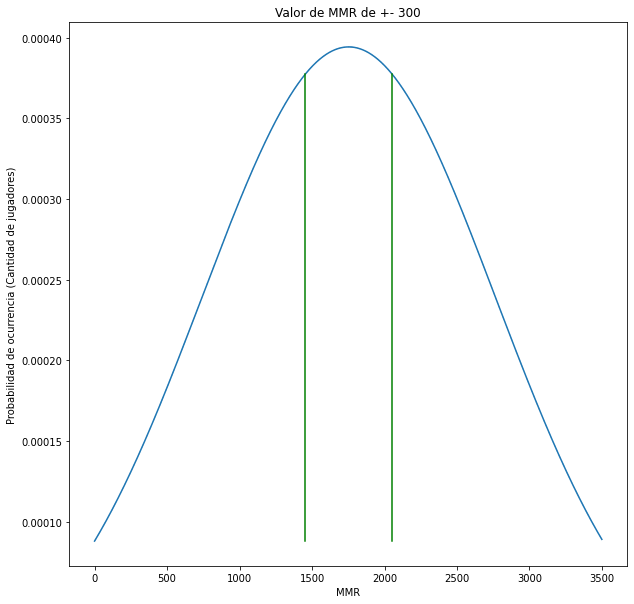

In [ ]:
# varianza de +- 300

xlower, ylower = [mean-300,mean-300], [min(pdf), pdf300lower]
xupper, yupper = [mean+300,mean+300], [min(pdf), pdf300upper]

plt.figure(figsize=(10,10))
sns.lineplot(total_players, pdf)
# plt.plot(total_players,pdf,color='red')
plt.plot(xlower, ylower,color='green')
plt.plot(xupper, yupper,color='green')
plt.title('Valor de MMR de +- 300')
plt.xlabel('MMR')
plt.ylabel('Probabilidad de ocurrencia (Cantidad de jugadores)')
plt.show()

In [ ]:
pdf500lower = norm.pdf(mean-500, loc=mean, scale=std) # límite inferior
print(pdf500lower)
pdf500upper = norm.pdf(mean+500, loc=mean, scale=std) # límite superior
print(pdf500upper)

0.00034892344925886184
0.00034892344925886184


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


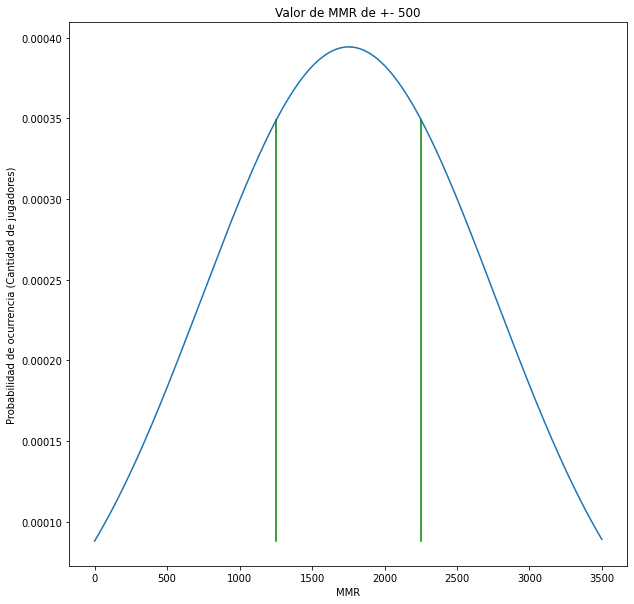

In [ ]:
# varianza de +- 500

xlower, ylower = [mean-500,mean-500], [min(pdf), pdf500lower]
xupper, yupper = [mean+500,mean+500], [min(pdf), pdf500upper]

plt.figure(figsize=(10,10))
sns.lineplot(total_players, pdf)
# plt.plot(total_players,pdf,color='red')
plt.plot(xlower, ylower,color='green')
plt.plot(xupper, yupper,color='green')
plt.title('Valor de MMR de +- 500')
plt.xlabel('MMR')
plt.ylabel('Probabilidad de ocurrencia (Cantidad de jugadores)')
plt.show()

## Un último experimento.

Vamos a suponer que el sistema trata de armar una partida lo más justa posible, es decir, establece una varianza máxima de $\pm 100 $. Veamos cuántos jugadores hay disponibles si usamos el valor medio como referencia.

In [ ]:
### Para una varianza de +-100

cdf_upper_limit100 = norm(loc=mean, scale=std).cdf(mean+100) # límite superior
cdf_lower_limit100 = norm(loc=mean, scale=std).cdf(mean-100) # límite inferior

prob3 = cdf_upper_limit100 - cdf_lower_limit100
print(prob3)

0.0787160489746927


In [ ]:
ppf1 = norm(loc=mean, scale=std).ppf(cdf_upper_limit100)
print(ppf1)
ppf2 = norm(loc=mean, scale=std).ppf(cdf_lower_limit100)
print(ppf2)

print('Cantidad de jugadores disponibles: %d' % int(ppf1-ppf2))

1853.0437391136056
1653.0437391136056
Cantidad de jugadores disponibles: 200


### La gráfica

In [ ]:
pdf100lower = norm.pdf(mean-100, loc=mean, scale=std) # límite inferior
print(pdf100lower)
pdf100upper = norm.pdf(mean+100, loc=mean, scale=std) # límite superior
print(pdf100upper)

0.00039230084702806807
0.00039230084702806807


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


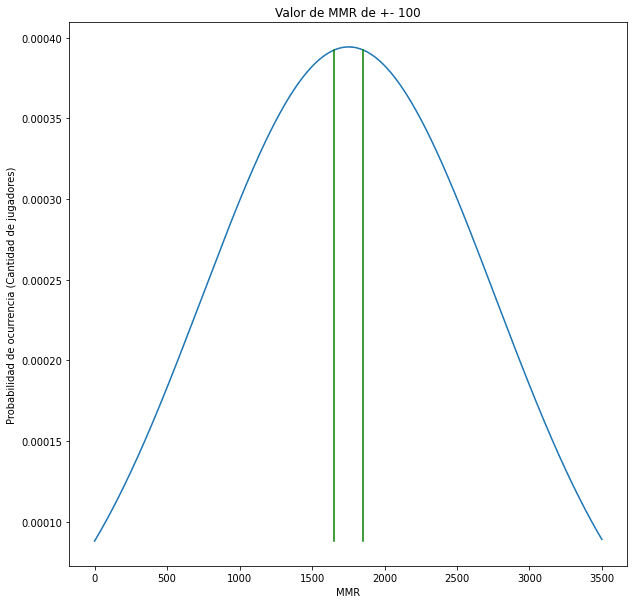

In [ ]:
# varianza de +- 100

xlower, ylower = [mean-100,mean-100], [min(pdf), pdf100lower]
xupper, yupper = [mean+100,mean+100], [min(pdf), pdf100upper]

plt.figure(figsize=(10,10))
sns.lineplot(total_players, pdf)
# plt.plot(total_players,pdf,color='red')
plt.plot(xlower, ylower,color='green')
plt.plot(xupper, yupper,color='green')
plt.title('Valor de MMR de +- 100')
plt.xlabel('MMR')
plt.ylabel('Probabilidad de ocurrencia (Cantidad de jugadores)')
plt.show()